# Text Analysis of Titles Descriptions and Tags

In [1]:
import pandas as pd
import numpy as np
import re
import datetime  
import matplotlib.pyplot as plt

#natural language toolkit for list of stop words
import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('data/mergedData.csv')

## Titles and Descriptions

In [3]:
#make all title and descriptions lowercase
title = data['title_x'].str.lower()
desc = data['description'].str.lower()

In [4]:
#look at some titles
title.head(5)

0    handmade stoneware ceramic blue & brown dish, ...
1    handmade stoneware ceramic pot, perfect for sa...
2    handmade organic ceramic bowl,  blue & brown p...
3    handmade stoneware ceramic pinch pot, perfect ...
4    handmade stoneware ceramic  dish. jewellery, t...
Name: title_x, dtype: object

In [5]:
#look at some descriptions
desc.head(5)

0    unique handmade ceramic dish hand-moulded from...
1    unique handmade ceramic  pinch pot, bisque fir...
2    unique handmade ceramic bowl, bisque fired and...
3    unique handmade ceramic  pinch pot, bisque fir...
4    unique handmade ceramic hand-moulded from slab...
Name: description, dtype: object

In [6]:
#get the length of the longest title 
title.str.len().max()

172

In [7]:
#get the length of the longest descriptons
desc.str.len().max()

9086

### Looking at listings that contain specific products of interest

In [8]:
#DELETE LATER
#percentage of listings that contain the word "mug" in the description
#mugs = desc[desc.str.contains(' mug ')==True]
#len(mugs)/len(desc)

In [9]:
#percentage of listings that contain a specific word

def percentage_item(text, word):
    true = text[text.str.contains(' ' + word + ' ')==True]
    percent = len(true)/len(text)
    return percent

In [10]:
#percentage of listings that contain the word "mug" in the TITLE
percentage_item(title, "mug")

0.115

In [11]:
#percentage of listings that contain the word "mug" in the DESCRIPTION
percentage_item(desc, "mug")

0.212

In [12]:
#percentage of listings that contain a specific product

items = ['mug', 'plate', 'bowl', 'jar', 'planter', 'berry bowl', 'butter dish', 'cup', 'tumbler', 'bacon cooker', 'spoon rest']

for i in items:
    print(i, percentage_item(title, i), percentage_item(desc, i))


mug 0.115 0.212
plate 0.033666666666666664 0.06225
bowl 0.07908333333333334 0.13783333333333334
jar 0.012666666666666666 0.01525
planter 0.012333333333333333 0.01775
berry bowl 0.001 0.0014166666666666668
butter dish 0.0025 0.00225
cup 0.060583333333333336 0.11091666666666666
tumbler 0.010416666666666666 0.016666666666666666
bacon cooker 0.0 0.00016666666666666666
spoon rest 0.004 0.01


### Remove punctuation, special characters and stop words from the titles and descriptons

Note that this loop isnt removing "\n" so might need a different method to do that

In [13]:
# function that removes "\n", links, as well as special characters and numbers fromt text
def clean_text(text):
    for i in range (0, len(text)):
        n = '\n'
        string = text[i]
        if n in string:
            string = string.replace(n, " ")
            text[i] = string
        text[i] = re.sub("[^A-za-z]+"," ", text[i])
        text[i] = re.sub(r"http\S+","",text[i])
        text[i] = re.sub(r"www\S+","",text[i])

In [14]:
# Clean descriptions and titles
clean_text(desc)
clean_text(title)

In [15]:
#split the title strings on the spaces
title = title.str.split(" ")

In [16]:
#split the description strings
desc = desc.str.split(" ")

In [17]:
desc

0        [unique, handmade, ceramic, dish, hand, moulde...
1        [unique, handmade, ceramic, pinch, pot, bisque...
2        [unique, handmade, ceramic, bowl, bisque, fire...
3        [unique, handmade, ceramic, pinch, pot, bisque...
4        [unique, handmade, ceramic, hand, moulded, fro...
                               ...                        
11995    [a, stylish, studio, pottery, vase, in, a, bro...
11996    [free, shipping, with, tracking, included, cra...
11997    [vintage, handmade, hand, thrown, salt, glaze,...
11998    [stunning, retro, style, mug, with, rich, brow...
11999    [this, is, a, hand, built, ceramic, vase, meas...
Name: description, Length: 12000, dtype: object

In [19]:
## define the stopwords
stop = stopwords.words('english')

In [27]:
#add pottery-related keywords, and other irrelevant words to stopwords
potteryStop = ['handmade','stoneware','pottery','ceramic','clay','x', '|','cm', 'oz', ' ', '', 'www'
'shipping','item','items','hand','made','piece','pieces','make','please','one','use','may','inches','also','high','etsy', 'quot']
stop.extend(potteryStop)

Delete Later: list comprehension to remove all instances of the stop words, this seems to work better than .remove and filter()
#list = [w for w in list if w != word]

TO DO: Turn this into a function

In [28]:
# remove all instances of the stop words from the descriptions
for i in range (0, len(desc)-1):
    for s in stop:
        list = desc[i]
        list = [w for w in list if w != s]
        desc[i] = list

In [22]:
# remove all instances of the stop words from the titles
for i in range (0, len(title)-1):
    for s in stop:
        list = title[i]
        list = [w for w in list if w != s]
        title[i] = list

### Save the cleaned descriptions and titles to csv to use for clustering algorithm

In [32]:
title.to_csv('titles-cleaned.csv')
desc.to_csv('descriptions-cleaned.csv')

### Word Counts

In [24]:
#define a function that reduces a column to a 1-dimensional series (to get word counts)
def oneD(column):
 return pd.Series([x for list in column for x in list])

In [25]:
#get the value counts for each of the words in the description
descWordCounts = oneD(desc).value_counts()

In [26]:
#look at top 25 words in the descriptions
top25desc = descWordCounts.head(25).sort_values(ascending=False)
top25desc

              12532
safe          10280
glaze          9011
mug            7741
dishwasher     6464
unique         5771
fired          5521
food           5363
microwave      5308
bowl           5208
shop           5101
glazed         5064
com            4626
wheel          4217
www            4145
free           4066
gift           3869
thrown         3813
white          3750
diameter       3660
glazes         3583
size           3406
blue           3396
cup            3365
height         3193
dtype: int64

In [29]:
#get the value counts for each of the words in the titles
titleWordCounts = oneD(title).value_counts()

ARG WHY IS THERE STILL AN EMPTY STRING HERE!!!! Fix this next time

In [30]:
#look at top 25 words in the titles
top25title = titleWordCounts.head(25).sort_values(ascending=False)
top25title

mug        6594
bowl       3541
coffee     2520
cup        2346
           2243
blue       1707
gift       1634
vase       1620
tea        1553
set        1344
plate      1249
white      1206
thrown     1143
dish       1113
large       932
green       913
small       846
vintage     807
glaze       789
pot         784
wheel       715
unique      711
rustic      686
black       662
serving     646
dtype: int64

## Tags

In [33]:
#make all tags lowercase
data['tags'] = data['tags'].str.lower()

In [34]:
#transform tags column from strings to lists
data['tags'] = data['tags'].apply(eval)

In [35]:
#look at the tags
data['tags']

0        [gift, ceramic, pottery, handmade, plate, jewe...
1        [candle holder, blue, stoneware, spice, salt, ...
2        [rustic bowl, rustic pottery, rustic, handmade...
3        [blue, stoneware, spice, salt, pot, pinch pots...
4        [ornament, soap, gift, ceramic, pottery, handm...
                               ...                        
11995    [vintage, studio, pottery, brown, stoneware, v...
11996    [danish stoneware, söholm, søholm, denmark, ho...
11997    [handmade ceramic pot, stoneware pot, drip gla...
11998    [stoneware mug, vintage mug, retro mug, brown ...
11999    [ceramic vase, pottery vase, stoneware vase, w...
Name: tags, Length: 12000, dtype: object

In [36]:
#get just the tags
tags = data['tags']

### Remove pottery-related stopwords from the tags

In [37]:
#define common stopwords
stop = ['handmade','stoneware','pottery','ceramic','clay','handmade pottery','stoneware pottery','ceramics','handmade ceramics']

In [38]:
#remove stop words from tags
for i in range (0, len(tags)):
    for s in stop:
        tags_list = tags[i]
        if s in tags_list:
            tags_list.remove(s)

In [39]:
#add clean tags to original df
data['clean_tags'] = tags
data['clean_tags']

0        [gift, plate, jewellery, dish, kitchen, jewele...
1        [candle holder, blue, spice, salt, pot, gift, ...
2        [rustic bowl, rustic pottery, rustic, ceramic ...
3        [blue, spice, salt, pot, pinch pots, gift, tab...
4        [ornament, soap, gift, dish, kitchen, jewelery...
                               ...                        
11995    [vintage, studio, brown, vase, glazed, baluste...
11996    [danish stoneware, söholm, søholm, denmark, ho...
11997    [handmade ceramic pot, stoneware pot, drip gla...
11998    [stoneware mug, vintage mug, retro mug, brown ...
11999    [ceramic vase, pottery vase, stoneware vase, w...
Name: clean_tags, Length: 12000, dtype: object

In [40]:
#get the value counts for each of the tags
tagCounts = oneD(tags).value_counts()

In [41]:
#look at top 20 tags
top20 = tagCounts.head(20).sort_values(ascending=True)
top20

tea mug               422
housewarming gift     435
kitchen               438
tea cup               443
vase                  446
unique                529
bowl                  542
coffee cup            570
blue                  582
home decor            603
wheel thrown          604
coffee                620
cup                   743
pottery mug           768
handmade mug          780
gift                  839
ceramic mug           868
stoneware mug         923
coffee mug            933
mug                  1104
dtype: int64

Text(0.5, 1.0, 'Frequency of Top 20 Tags')

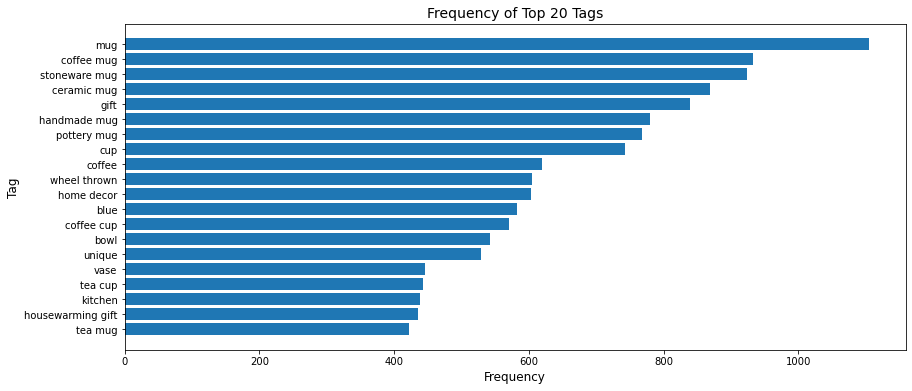

In [42]:
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top20.index,top20.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Frequency of Top 20 Tags", size = 14)

### Get top 20 tags for top-favorited and top number-sold listings

In [43]:
#dataframe with tags, num of favorites
itemData = data[['listing_id','clean_tags','num_favorers_x']]

In [44]:
#look at top 20 listings according to number of favorers
itemData.sort_values(by = ['num_favorers_x'], ascending = False).head(20)

,listing_id,clean_tags,num_favorers_x
4519,802264661,"[hand made pottery, hand painted ceramic, simp...",34939
4516,680440014,"[handmade plate set, gold kintsugi plate, pott...",15393
1083,792180615,"[ceramic mug, handpainted mug, nature mug, flo...",12463
1425,900330801,"[wheel thrown pottery, fine art ceramics, dini...",11609
6407,535025569,"[coffee cup, parceline, tea cup, coffee mug, c...",9700
508,741218574,"[handmade ceramic mug, handmade mug, ceramic m...",7936
705,151354984,"[cup, teacup, roses, dots, pink, light blue, m...",7476
1368,677424431,"[handmade coffee mug, birthday gift mug, coffe...",7441
8,889589581,"[ceramic mug, ceramic cup, vintage cup, vintag...",7032
1870,621980272,"[coffee, mug, rustic, cup, farmhouse, white, f...",6876


In [45]:
#this is the 3,873 listings with at least 10 favorers
TenOrMore = itemData[itemData['num_favorers_x']>=10]
#TenOrMore.shape

In [46]:
#get the value counts for each of the tags in TenOrMore
tagCountsFavs = oneD(TenOrMore["clean_tags"]).value_counts()
top20Favs = tagCountsFavs.head(20).sort_values(ascending=True)

Text(0.5, 1.0, 'Top 20 Tags for Listings With at Least 10 Favorites')

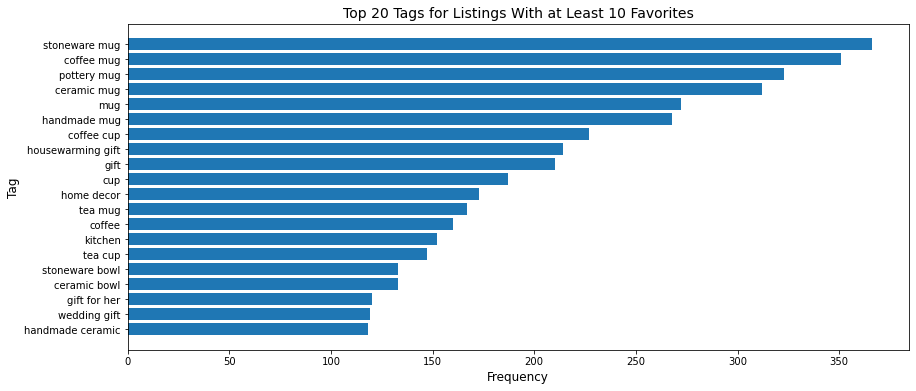

In [47]:
#create the bar chart
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top20Favs.index,top20Favs.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Top 20 Tags for Listings With at Least 10 Favorites", size = 14)

### Get top 20 tags for top-rated shops

In [48]:
#dataframe with tags, shop review count, and review average
shopData = data[['listing_id','clean_tags','num_favorers_x','review_average', 'review_count']]

In [49]:
shopData.sort_values(by = ['review_average'], ascending = False).head(20)

,listing_id,clean_tags,num_favorers_x,review_average,review_count
5760,1170280890,"[coffee mug, handmade ceramic, black stoneware...",0,5.0,7.0
7260,960455221,"[unique mug, tea cup, green mug, coffee mug, c...",1,5.0,3.0
7246,1028694923,"[wood-fired, wood-fired mug, pottery mug, cera...",0,5.0,13.0
7247,1014733518,"[wood-fired, wood-fired mug, pottery mug, cera...",1,5.0,13.0
7248,1028377115,"[wheel-thrown, wood-fired, wood-fired pottery,...",0,5.0,13.0
3253,890022473,"[mugs, coffee mugs, wheel-thrown, gift idea, t...",0,5.0,8.0
3252,1030992542,"[unique, dark blue, woven bowl, lattice work, ...",5,5.0,14.0
7249,1014649508,"[wheel-thrown, wood-fired, wood-fired pottery,...",1,5.0,13.0
7250,1014730216,"[wood-fired, wood-fired mug, pottery mug, cera...",0,5.0,13.0
7251,1028616973,"[wheel-thrown, wood-fired, wood-fired pottery,...",1,5.0,13.0


In [50]:
#this is the 9036 listings from shops with at least 10 reviews
TenReviews =  shopData[shopData['review_count']>=10]
#TenReviews

In [51]:
#get the value counts for each of the tags in TenReviews
tagCountsShops = oneD(TenReviews["clean_tags"]).value_counts()
top20Shops = tagCountsShops.head(20).sort_values(ascending=True)

Text(0.5, 1.0, 'Top 20 Tags for Listings from Shops with at Least 10 Reviews')

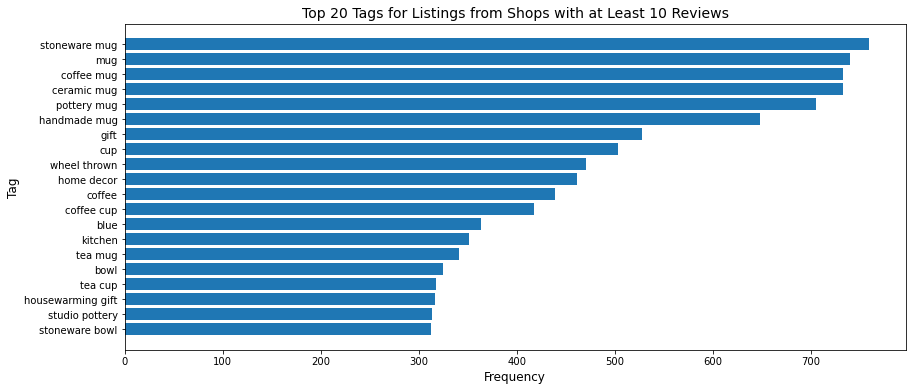

In [52]:
#create the bar chart
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top20Shops.index,top20Shops.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Top 20 Tags for Listings from Shops with at Least 10 Reviews", size = 14)

### TO DO LIST

#### Business Questions

Characteristics of a successful shop?  (High Ratings and high number of reviews)

Emerging trends/New Market Opportunites - compare to more recent set of listings

Identify highest selling product categories

Identify: Top companies, top products

Pricing - average pricing for items?

Model - Predict products based on text?  Hierarchical clustering?  TSNE w/dbscan

If you can get product clusters - overlay pricing?




#### TRy Kmeans with descriptions?   How many clusters? 